In [1]:
import pandas as pd
import numpy as np
import re

%matplotlib inline

from matplotlib import pyplot as plt
plt.style.use('ggplot')

import seaborn as sns

In [2]:
full_data = pd.read_csv("roto_scrape.csv", sep = ';', index_col=0)

/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3071: DtypeWarning: Columns (4,5,6,7,8) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
full_data.head()

,Week,Year,GID,Name,Pos,Team,h/a,Oppt,FD points,FD salary,DK points,DK salary,YH points,YH salary
0,1.0,2017.0,1254.0,"Smith, Alex",QB,kan,a,nwe,31.02,6900.0,34.02,5400.0,31.02,24.0
1,1.0,2017.0,1340.0,"Stafford, Matthew",QB,det,h,ari,28.08,7600.0,28.08,6100.0,28.08,30.0
2,1.0,2017.0,1344.0,"Bradford, Sam",QB,min,h,nor,25.54,7000.0,28.54,5900.0,25.54,31.0
3,1.0,2017.0,1488.0,"Siemian, Trevor",QB,den,h,lac,23.66,6700.0,23.66,5000.0,23.66,25.0
4,1.0,2017.0,1514.0,"Wentz, Carson",QB,phi,a,was,19.88,7100.0,23.88,5300.0,19.88,27.0


In [5]:
full_data.dtypes

Week         float64
Year         float64
GID          float64
Name          object
Pos           object
Team          object
h/a           object
Oppt          object
FD points    float64
FD salary    float64
DK points    float64
DK salary    float64
YH points    float64
YH salary    float64
dtype: object

In [3]:
data_2021 = full_data[full_data['Year'] == 2021]
data_2021

,Week,Year,GID,Name,Pos,Team,h/a,Oppt,FD points,FD salary,DK points,DK salary,YH points,YH salary
416063,1.0,2021.0,1537.0,"Murray, Kyler",QB,ari,a,ten,34.56,8400.0,34.56,7600.0,34.56,34.0
416064,1.0,2021.0,1523.0,"Mahomes II, Patrick",QB,kan,h,cle,33.28,8800.0,36.28,8100.0,33.28,40.0
416065,1.0,2021.0,1490.0,"Goff, Jared",QB,det,h,sfo,29.92,6500.0,32.92,5100.0,29.92,20.0
416066,1.0,2021.0,1465.0,"Winston, Jameis",QB,nor,h,gnb,29.62,6700.0,29.62,5200.0,29.62,24.0
416067,1.0,2021.0,1131.0,"Brady, Tom",QB,tam,h,dal,29.16,7800.0,32.16,6700.0,29.16,34.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
418210,5.0,2021.0,7020.0,New York G,Def,nyg,a,dal,2.00,3000.0,2.00,2600.0,2.00,10.0
418211,5.0,2021.0,7008.0,Cleveland,Def,cle,a,lac,0.00,4100.0,0.00,2700.0,0.00,16.0
418212,5.0,2021.0,7015.0,Kansas City,Def,kan,h,buf,-1.00,3300.0,-1.00,3000.0,-1.00,11.0
418213,5.0,2021.0,7016.0,Miami,Def,mia,a,tam,-2.00,3600.0,-2.00,2400.0,-2.00,12.0


In [7]:
np.unique(data_2021['Name']).shape

(508,)

In [3]:
data_2020 = full_data[full_data['Year'] == 2020]
data_2020

,Week,Year,GID,Name,Pos,Team,h/a,Oppt,FD points,FD salary,DK points,DK salary,YH points,YH salary
409187,1.0,2020.0,1412.0,"Wilson, Russell",QB,sea,a,atl,31.78,8400.0,34.78,7000.0,31.78,33.0
409188,1.0,2020.0,1252.0,"Rodgers, Aaron",QB,gnb,a,min,30.76,7600.0,33.76,6300.0,30.76,28.0
409189,1.0,2020.0,1529.0,"Allen, Josh",QB,buf,h,nyj,28.18,7900.0,33.18,6500.0,28.18,31.0
409190,1.0,2020.0,1527.0,"Jackson, Lamar",QB,bal,h,cle,27.50,9300.0,27.50,8100.0,27.50,38.0
409191,1.0,2020.0,1537.0,"Murray, Kyler",QB,ari,a,sfo,27.30,7700.0,27.30,6400.0,27.30,29.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
416058,17.0,2020.0,7011.0,Detroit,Def,det,h,min,-1.00,3400.0,-1.00,2200.0,-1.00,11.0
416059,17.0,2020.0,7015.0,Kansas City,Def,kan,h,lac,-1.00,4200.0,-1.00,3100.0,-1.00,17.0
416060,17.0,2020.0,7002.0,Atlanta,Def,atl,a,tam,-1.00,3300.0,-1.00,2400.0,-1.00,13.0
416061,17.0,2020.0,7006.0,Chicago,Def,chi,h,gnb,-1.00,4100.0,-1.00,2700.0,-1.00,11.0


In [5]:
data_2020.groupby('Pos')['DK points','FD points', 'YH points'].agg(['mean', 'std']).round(2)

<ipython-input-5-ae7d358d58ab>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  data_2020.groupby('Pos')['DK points','FD points', 'YH points'].agg(['mean', 'std']).round(2)


DK points        FD points       YH points      
         mean    std      mean   std      mean   std
Pos                                                 
Def      5.96   5.73      6.00  5.74      5.96  5.73
QB      16.05  10.71     15.22  9.95     15.22  9.95
RB       6.96   8.30      6.07  7.38      6.07  7.38
TE       4.53   6.06      3.63  5.00      3.63  5.00
WR       7.80   8.58      6.20  6.93      6.20  6.93

In [131]:
qb_data_2020[qb_data_2020['Week'] == 5 ]

,Week,Year,GID,Name,Pos,Team,h/a,Oppt,FD points,FD salary,DK points,DK salary,YH points,YH salary
410896,5.0,2020.0,1523.0,"Mahomes II, Patrick",QB,kan,h,lvr,30.70,9000.0,33.70,7700.0,30.70,38.0
410897,5.0,2020.0,1410.0,"Tannehill, Ryan",QB,ten,h,buf,30.00,7000.0,30.00,6000.0,30.00,30.0
410898,5.0,2020.0,1242.0,"Fitzpatrick, Ryan",QB,mia,a,sfo,27.60,7100.0,30.60,5600.0,27.60,26.0
410899,5.0,2020.0,1552.0,"Herbert, Justin",QB,lac,a,nor,27.36,7000.0,27.36,6000.0,27.36,28.0
410900,5.0,2020.0,1537.0,"Murray, Kyler",QB,ari,a,nyj,27.30,8300.0,30.30,7200.0,27.30,40.0
410901,5.0,2020.0,1518.0,"Watson, Deshaun",QB,hou,h,jac,26.86,7900.0,29.86,6900.0,26.86,30.0
410902,5.0,2020.0,1412.0,"Wilson, Russell",QB,sea,h,min,25.48,8600.0,25.48,7600.0,25.48,41.0
410903,5.0,2020.0,1490.0,"Goff, Jared",QB,lar,a,was,25.36,7500.0,28.36,6500.0,25.36,31.0
410904,5.0,2020.0,1441.0,"Carr, Derek",QB,lvr,a,kan,24.98,6900.0,27.98,5300.0,24.98,24.0
410905,5.0,2020.0,1151.0,"Brees, Drew",QB,nor,h,lac,22.10,7600.0,25.10,6100.0,22.10,27.0


In [10]:
data_2020.groupby('Pos')['DK salary','FD salary', 'YH salary'].agg(['mean', 'std'])

<ipython-input-10-c5c403847725>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  data_2020.groupby('Pos')['DK salary','FD salary', 'YH salary'].agg(['mean', 'std'])


DK salary                 FD salary               YH salary          
            mean          std         mean          std       mean       std
Pos                                                                         
Def  2873.828125   641.868141  3908.593750   731.272632  14.355469  3.279929
QB   5728.438949  1193.271074  7026.234568  1256.103499  26.520866  6.355012
RB   4632.789651  1307.869425  5304.971751  1352.387552  14.362971  6.689413
TE   3106.939625  1010.861364  4598.401668   915.287533  11.800139  3.929981
WR   4106.971154  1512.096675  5269.687249  1258.184335  14.159566  6.195179

In [12]:
data_2020.groupby(['Name', 'Pos'])['DK points','FD points', 'YH points'].agg('sum').sort_values('DK points',ascending=False).head(20)

<ipython-input-12-91e181dc27f4>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  data_2020.groupby(['Name', 'Pos'])['DK points','FD points', 'YH points'].agg('sum').sort_values('DK points',ascending=False).head(20)


,,DK points,FD points,YH points
Name,Pos,,,
"Allen, Josh",QB,436.04,405.54,405.54
"Watson, Deshaun",QB,409.32,376.32,376.32
"Mahomes II, Patrick",QB,408.80,379.80,379.80
"Murray, Kyler",QB,406.74,390.74,390.74
"Rodgers, Aaron",QB,405.26,387.76,387.76
"Wilson, Russell",QB,391.78,372.78,372.78
"Kamara, Alvin",RB,383.80,336.30,336.30
"Adams, Davante",WR,380.40,300.90,300.90
"Brady, Tom",QB,371.92,349.92,349.92


In [59]:
#full_data.groupby('Year')['FD points'].agg('sum')
full_data.loc[full_data['Year'] != 2021.0].groupby('Year')['FD points'].agg('sum')

Year
2017.0    40968.88
2018.0    43748.52
2019.0    42951.68
2020.0    44440.92
Name: FD points, dtype: float64

Text(0.5, 0, '*2021 not included but on pace to exceed 2020 total points*')

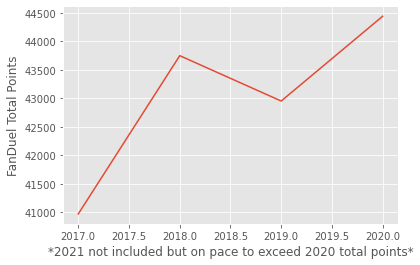

In [65]:
plt.plot(full_data.loc[full_data['Year'] != 2021.0].groupby('Year')['FD points'].agg('sum'))
plt.ylabel('FanDuel Total Points')
plt.xlabel('*2021 not included but on pace to exceed 2020 total points*')

In [8]:
full_data.loc[full_data['Year'] != 2021.0].groupby('Year')['FD salary'].agg('mean')

Year
2017.0    5334.101655
2018.0    5226.615913
2019.0    5271.736527
2020.0    5202.345913
Name: FD salary, dtype: float64

Text(0.5, 0, 'Year')

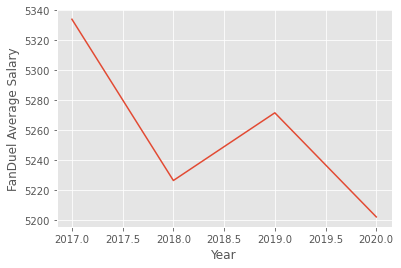

In [9]:
plt.plot(full_data.loc[full_data['Year'] != 2021.0].groupby('Year')['FD salary'].agg('mean'))
plt.ylabel('FanDuel Average Salary')
plt.xlabel('Year')

In [40]:
# def col_0_to_nan(df, col):
#     df[col] = [val is np.nan if val == 0 else val for val in df[col]]
#     df[col] = [val is np.nan if val == 'False' else val for val in df[col]]

In [7]:
drop_empty_salary = data_2020[data_2020['FD salary'] > 2000]

[Text(0, 0.5, 'Individual Player Points'),
 Text(0.5, 0, 'Individual Player Salaries')]

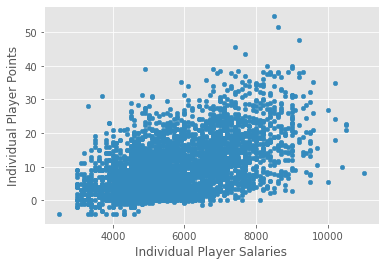

In [14]:
scat_plot = drop_empty_salary[['FD salary', 'FD points']].plot.scatter('FD salary', 'FD points')
scat_plot.set(xlabel= 'Individual Player Salaries', ylabel = 'Individual Player Points')

In [39]:
drop_empty_salary['bin'] = pd.cut(drop_empty_salary['FD salary'], bins=range(2000,12001,2000), labels=[f'{l}-{l+2}' for l in range(2,11,2)])

<ipython-input-39-faf14f2cd850>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  drop_empty_salary['bin'] = pd.cut(drop_empty_salary['FD salary'], bins=range(2000,12001,2000), labels=[f'{l}-{l+2}' for l in range(2,11,2)])


[Text(0.5, 0, 'Salary Range in Thousands')]

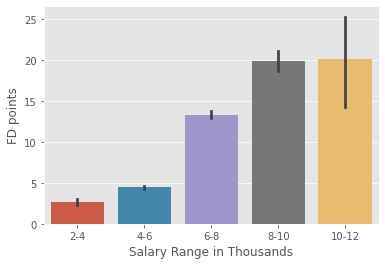

In [40]:
sns.barplot(x='bin', y='FD points', data=drop_empty_salary).set(xlabel = 'Salary Range in Thousands')

In [26]:
wr_data_2020 = data_2020.loc[data_2020['Pos'] == 'WR']

In [20]:
rb_data_2020 = data_2020.loc[data_2020['Pos'] == 'RB']

In [22]:
qb_data_2020 = data_2020.loc[data_2020['Pos'] == 'QB']

In [47]:
#qb_data_2020.groupby('Name')['FDP/$'].agg('mean').sort_values(ascending = False)[:10]
qb_data_2020.loc[data_2020['Name'] == 'Dalton, Andy']

,Week,Year,GID,Name,Pos,Team,h/a,Oppt,FD points,FD salary,DK points,DK salary,YH points,YH salary
409658,2.0,2020.0,1403.0,"Dalton, Andy",QB,dal,h,atl,0.00,6000.0,0.00,5000.0,0.00,20.0
410925,5.0,2020.0,1403.0,"Dalton, Andy",QB,dal,h,nyg,2.44,6000.0,3.44,4100.0,2.44,20.0
411287,6.0,2020.0,1403.0,"Dalton, Andy",QB,dal,h,ari,13.04,7000.0,13.04,5800.0,13.04,27.0
411667,7.0,2020.0,1403.0,"Dalton, Andy",QB,dal,a,was,3.60,7200.0,3.60,6000.0,3.60,28.0
413156,11.0,2020.0,1403.0,"Dalton, Andy",QB,dal,a,min,19.82,6900.0,20.32,5300.0,19.82,26.0
413542,12.0,2020.0,1403.0,"Dalton, Andy",QB,dal,h,was,13.30,6800.0,13.30,5600.0,13.30,24.0
413962,13.0,2020.0,1403.0,"Dalton, Andy",QB,dal,a,bal,18.60,0.0,18.60,0.0,18.60,22.0
414352,14.0,2020.0,1403.0,"Dalton, Andy",QB,dal,a,cin,15.30,6800.0,15.30,5500.0,15.30,23.0
414780,15.0,2020.0,1403.0,"Dalton, Andy",QB,dal,h,sfo,17.16,6700.0,17.16,5400.0,17.16,25.0
415200,16.0,2020.0,1403.0,"Dalton, Andy",QB,dal,h,phi,27.58,6900.0,30.58,5500.0,27.58,21.0


In [32]:
qb_data_2020[qb_data_2020.Name == 'Allen, Brandon']

,Week,Year,GID,Name,Pos,Team,h/a,Oppt,FD points,FD salary,DK points,DK salary,YH points,YH salary
413549,12.0,2020.0,1504.0,"Allen, Brandon",QB,cin,h,nyg,7.14,6000.0,8.14,4800.0,7.14,0.0
413972,13.0,2020.0,1504.0,"Allen, Brandon",QB,cin,a,mia,9.42,6000.0,9.42,4800.0,9.42,20.0
414354,14.0,2020.0,1504.0,"Allen, Brandon",QB,cin,h,dal,13.88,6500.0,13.88,4900.0,13.88,20.0
415207,16.0,2020.0,1504.0,"Allen, Brandon",QB,cin,a,hou,23.14,6600.0,26.14,4800.0,23.14,20.0
415677,17.0,2020.0,1504.0,"Allen, Brandon",QB,cin,h,bal,0.12,6800.0,0.12,5000.0,0.12,21.0


In [44]:
fd_cumpoints = qb_data_2020.groupby('Name').apply(lambda grp: np.cumsum(grp.sort_values('Week')[['FD points']])).reset_index()
fd_cumpoints = fd_cumpoints.drop('Name', axis=1).rename({'FD points': 'FD_cum_points'}, axis=1)

In [45]:
fd_cumpoints.columns

Index(['level_1', 'FD_cum_points'], dtype='object')

In [46]:
FD_cumulative = pd.merge(qb_data_2020, fd_cumpoints, left_index=True, right_on='level_1')

In [47]:
FD_cumulative[FD_cumulative.Name == 'Wilson, Russell']

,Week,Year,GID,Name,Pos,Team,h/a,Oppt,FD points,FD salary,DK points,DK salary,YH points,YH salary,level_1,FD_cum_points
622,1.0,2020.0,1412.0,"Wilson, Russell",QB,sea,a,atl,31.78,8400.0,34.78,7000.0,31.78,33.0,409187,31.78
623,2.0,2020.0,1412.0,"Wilson, Russell",QB,sea,h,nwe,34.42,8100.0,34.42,6500.0,34.42,33.0,409626,66.20
624,3.0,2020.0,1412.0,"Wilson, Russell",QB,sea,h,dal,36.80,8700.0,39.80,7300.0,36.80,36.0,410052,103.00
625,4.0,2020.0,1412.0,"Wilson, Russell",QB,sea,a,mia,21.90,9000.0,24.90,7800.0,21.90,42.0,410494,124.90
626,5.0,2020.0,1412.0,"Wilson, Russell",QB,sea,h,min,25.48,8600.0,25.48,7600.0,25.48,41.0,410902,150.38
627,7.0,2020.0,1412.0,"Wilson, Russell",QB,sea,a,ari,32.92,8700.0,35.92,8000.0,32.92,39.0,411645,183.30
628,8.0,2020.0,1412.0,"Wilson, Russell",QB,sea,h,sfo,28.74,8700.0,28.74,7800.0,28.74,40.0,412012,212.04
629,9.0,2020.0,1412.0,"Wilson, Russell",QB,sea,a,buf,24.10,9000.0,29.10,7600.0,24.10,40.0,412398,236.14
630,10.0,2020.0,1412.0,"Wilson, Russell",QB,sea,a,lar,11.92,8900.0,12.92,7700.0,11.92,38.0,412781,248.06
631,11.0,2020.0,1412.0,"Wilson, Russell",QB,sea,h,ari,20.08,8800.0,20.08,7400.0,20.08,39.0,413155,268.14


In [ ]:
drop_empty_salary = data_2020[data_2020['FD salary'] > 2000]

In [51]:
wr_data_2020.groupby('Name')['DK points'].agg('mean').sort_values(ascending = False)[:10]

Name
Adams, Davante       27.171429
Hill, Tyreek         22.526667
Diggs, Stefon        21.850000
Ridley, Calvin       20.433333
Hopkins, DeAndre     19.425000
Brown, A.J.          18.592857
Fuller, Will         18.536364
Allen, Keenan        18.507143
Jefferson, Justin    18.450000
Metcalf, D.K.        17.956250
Name: DK points, dtype: float64

In [53]:
rb_data_2020.groupby('Name')['DK points'].agg('mean').sort_values(ascending = False)[:10]

Name
McCaffrey, Christian    30.100000
Cook, Dalvin            26.057143
Kamara, Alvin           25.586667
Henry, Derrick          22.818750
Jones, Aaron            19.135714
Chubb, Nick             18.891667
Robinson, James         18.814286
Montgomery, David       18.320000
Taylor, Jonathan        17.520000
Mixon, Joe              17.266667
Name: DK points, dtype: float64

In [54]:
qb_data_2020.groupby('Name')['DK points'].agg('mean').sort_values(ascending = False)[:10]

Name
Prescott, Dak          30.328000
Mahomes II, Patrick    27.253333
Allen, Josh            27.252500
Mariota, Marcus        26.840000
Watson, Deshaun        25.582500
Murray, Kyler          25.421250
Rodgers, Aaron         25.328750
Herbert, Justin        24.522667
Wilson, Russell        24.486250
Jackson, Lamar         23.452000
Name: DK points, dtype: float64

In [27]:
DA_2020 = wr_data_2020[wr_data_2020['Name'] == 'Adams, Davante'][['Name', 'Week','FD points', 'FD salary']]
DA_2020

,Name,Week,FD points,FD salary
409342,"Adams, Davante",1.0,34.6,8000.0
409849,"Adams, Davante",2.0,5.1,8600.0
411427,"Adams, Davante",6.0,9.1,9000.0
411773,"Adams, Davante",7.0,38.1,8900.0
412144,"Adams, Davante",8.0,26.8,9100.0
412524,"Adams, Davante",9.0,28.3,9400.0
412917,"Adams, Davante",10.0,14.6,9500.0
413281,"Adams, Davante",11.0,20.1,9500.0
413684,"Adams, Davante",12.0,15.1,9500.0
414082,"Adams, Davante",13.0,29.1,9500.0


Text(0.5, 0.98, 'Davante Adams Points per Week - 2020 Season')

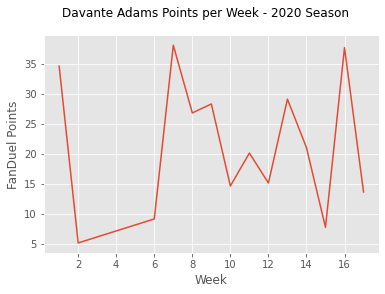

In [34]:
plt.plot(DA_2020['Week'], DA_2020['FD points'])
plt.ylabel('FanDuel Points')
plt.xlabel('Week')
plt.suptitle('Davante Adams Points per Week - 2020 Season')

Text(0.5, 0.98, 'Davante Adams Salary each Week - 2020 Season')

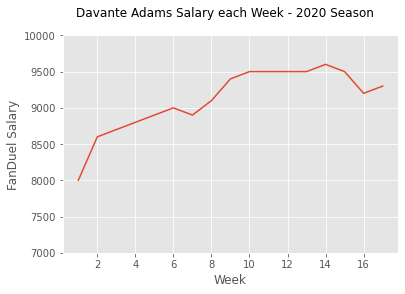

In [35]:
plt.plot(DA_2020['Week'], DA_2020['FD salary'])
plt.ylabel('FanDuel Salary')
plt.xlabel('Week')
plt.ylim(7000,10000)
plt.suptitle('Davante Adams Salary each Week - 2020 Season')

In [23]:
AROD_2020 = qb_data_2020[qb_data_2020['Name'] == 'Rodgers, Aaron'][['Name', 'Week','FD points', 'FD salary']]
AROD_2020

,Name,Week,FD points,FD salary
409188,"Rodgers, Aaron",1.0,30.76,7600.0
409639,"Rodgers, Aaron",2.0,18.70,7900.0
410058,"Rodgers, Aaron",3.0,24.52,7900.0
410483,"Rodgers, Aaron",4.0,29.58,8000.0
411292,"Rodgers, Aaron",6.0,5.80,8400.0
411648,"Rodgers, Aaron",7.0,27.32,8100.0
412015,"Rodgers, Aaron",8.0,22.54,8400.0
412393,"Rodgers, Aaron",9.0,28.90,8100.0
412767,"Rodgers, Aaron",10.0,26.40,8400.0
413150,"Rodgers, Aaron",11.0,22.74,9000.0


Text(0.5, 0, 'Week')

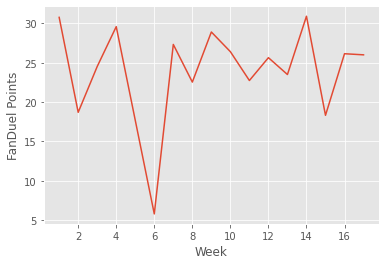

In [24]:
plt.plot(AROD_2020['Week'], AROD_2020['FD points'])
plt.ylabel('FanDuel Points')
plt.xlabel('Week')

(5000.0, 10000.0)

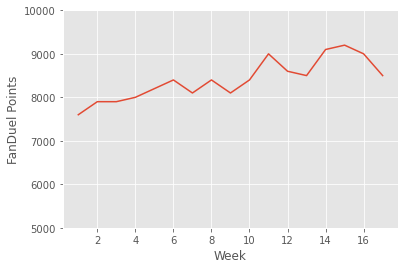

In [25]:
plt.plot(AROD_2020['Week'], AROD_2020['FD salary'])
plt.ylabel('FanDuel Points')
plt.xlabel('Week')
plt.ylim(5000,10000)

In [92]:
rb_data_2020[rb_data_2020['Name'] == 'Montgomery, David'][['Name', 'Week','FD points', 'FD salary']]

,Name,Week,FD points,FD salary
409262,"Montgomery, David",1.0,7.9,5900.0
409667,"Montgomery, David",2.0,20.2,5600.0
410129,"Montgomery, David",3.0,6.4,6100.0
410549,"Montgomery, David",4.0,9.2,5800.0
410945,"Montgomery, David",5.0,15.4,5800.0
411313,"Montgomery, David",6.0,11.7,5900.0
411700,"Montgomery, David",7.0,9.4,6000.0
412065,"Montgomery, David",8.0,11.5,5800.0
412475,"Montgomery, David",9.0,3.7,5900.0
413569,"Montgomery, David",12.0,22.8,6000.0


In [101]:
data_2020_fd = data_2020[['FD salary', 'FD points']]

In [102]:
data_2020_fd.corr()

,FD salary,FD points
FD salary,1.000000,0.547545
FD points,0.547545,1.000000


In [103]:
wr_data_2020_fd = wr_data_2020[['FD salary', 'FD points']]

In [104]:
wr_data_2020_fd.corr()

,FD salary,FD points
FD salary,1.000000,0.451842
FD points,0.451842,1.000000


In [105]:
qb_data_2020_fd = qb_data_2020[['FD salary', 'FD points']]

In [106]:
qb_data_2020_fd.corr()

,FD salary,FD points
FD salary,1.000000,0.423973
FD points,0.423973,1.000000


In [107]:
rb_data_2020_fd = rb_data_2020[['FD salary', 'FD points']]

In [108]:
rb_data_2020_fd.corr()

,FD salary,FD points
FD salary,1.000000,0.547814
FD points,0.547814,1.000000


In [110]:
data_2020[['FD salary', 'FD points', 'DK salary', 'DK points', 'YH salary', 'YH points']].corr()

,FD salary,FD points,DK salary,DK points,YH salary,YH points
FD salary,1.000000,0.547545,0.852271,0.551484,0.789647,0.547886
FD points,0.547545,1.000000,0.573312,0.990342,0.636788,0.999937
DK salary,0.852271,0.573312,1.000000,0.582606,0.842991,0.573564
DK points,0.551484,0.990342,0.582606,1.000000,0.625742,0.990452
YH salary,0.789647,0.636788,0.842991,0.625742,1.000000,0.636779
YH points,0.547886,0.999937,0.573564,0.990452,0.636779,1.000000


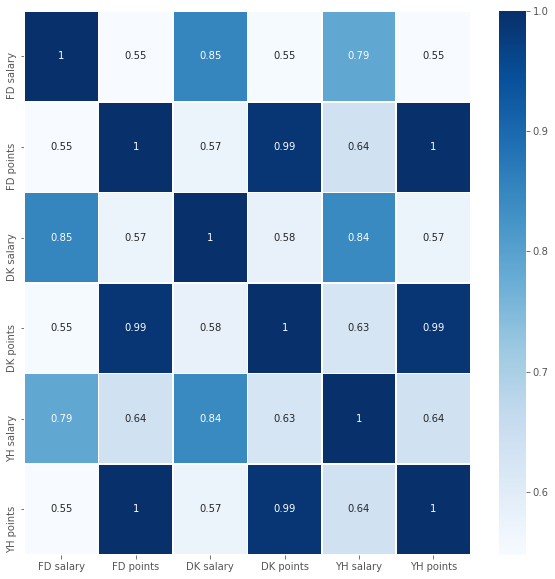

In [36]:
fig, ax = plt.subplots(figsize=(10,10))
correlation_mat = data_2020[['FD salary', 'FD points', 'DK salary', 'DK points', 'YH salary', 'YH points']].corr()
sns.heatmap(correlation_mat, annot = True, linewidths=.5, ax=ax, cmap = 'Blues')
plt.show()

In [77]:
# player_list = data_2020['Name'].sample(50).tolist()

In [80]:
# salary_corr = []
# points_corr = []

# for player in player_list:
#     temp = data_2020[data_2020['Name'] == player].sort_values('Week')
#     temp['FD points_lag1'] = temp['FD points'].shift(1)
#     temp['FD salary_lag1'] = temp['FD salary'].shift(1)
#     c_sal = temp[['FD salary_lag1', 'FD salary']].corr()
#     salary_corr.append(c_sal)
#     c_poi = temp[['FD points_lag1', 'FD points']].corr()
#     points_corr.append(c_poi)

# salary_corr